In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import empty


In [3]:
#Diffusion 
def t_diff(t,freq,L,l,z0,Db,a,td):
    A = -((L+2*z0)**2/np.pi**2)
    k = 2*np.pi*(freq/(a))
    B = Db*(1-(1/(k*l)**2)*(1+3*l/(2*L)*(7.25-4*np.log(L/l))))
    return (np.exp(np.abs(B)*(t-td)/A))

In [4]:
Db = lambda l:3e2*l/3
a=5/3
l = 1.12*a #fitted value 
z0 = 3.25 
nu = 0.41

#Let's calculate  adjusted values
k =  2*np.pi*(nu/(a))

kl = k*l/4.1
l_adjusted = kl/k
Db1 = Db(l_adjusted)
adjusted_xi = 6*l_adjusted*(k*l_adjusted)**2/(1-(k*l_adjusted)**4)

In [10]:
adjusted_xi/a

1.0754058781110725

In [6]:
#Anderson
def alpha_star(Db,xi,L):
    return (Db/xi**2)*np.exp(-L/xi)

def trans_t(t,alpha,z0,L,D,td=1,p=0.5,s=0.85): 
    
    A = ((L+2*z0)**2/np.pi**2)
    # if t<1/alpha:
    #     B = 1/(alpha*t)**(s+1)
    # else:
    #     B = np.exp(1)*np.exp(-alpha*t)/(t*alpha)**(p+1)

    B = (alpha*t)**-(s+1)*np.exp(1)*np.exp(-alpha*t)/(t*alpha)**(p+1)

    return B**(D*td/A)

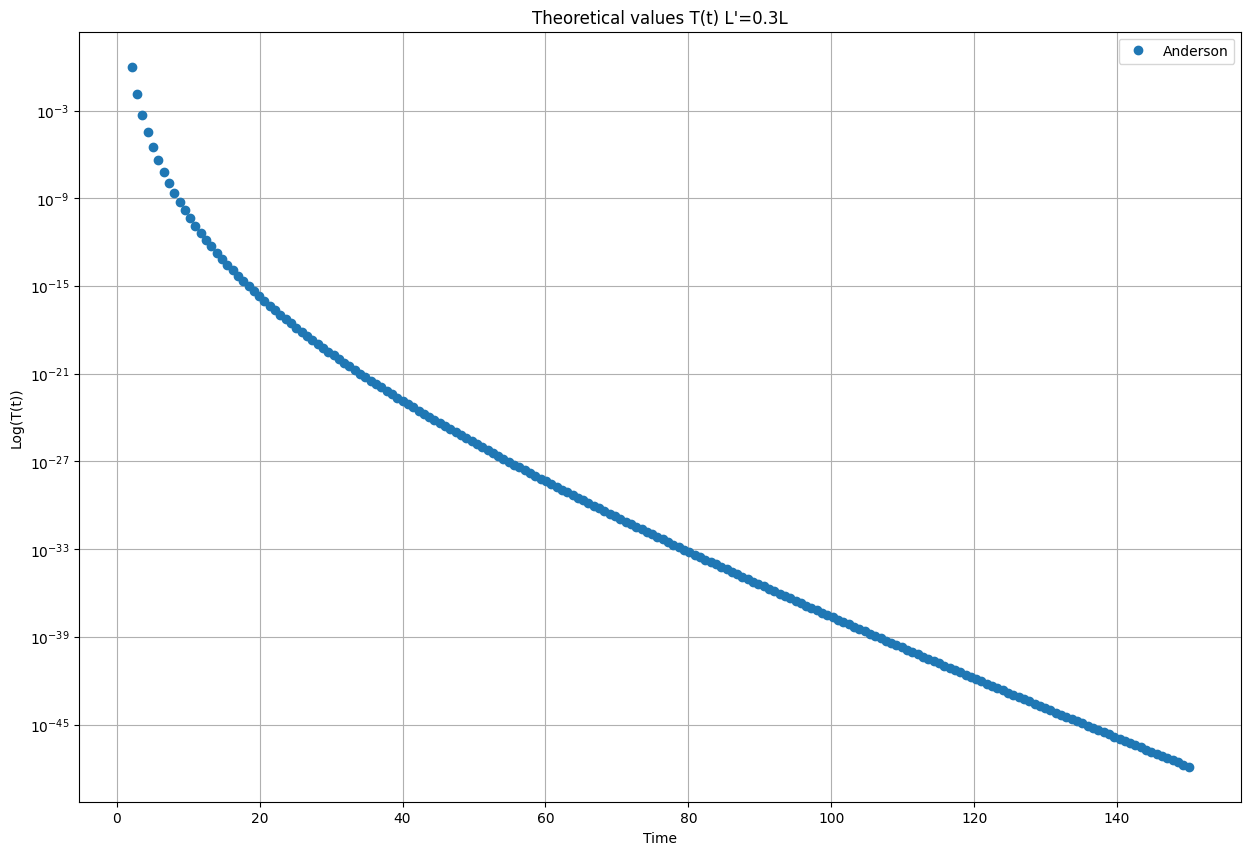

In [7]:
times = np.linspace(2.1,150,200)
for i in  np.array([0.3]):
    plt.figure(figsize=(15, 10))
    L = i*18.01*a
    alpha = alpha_star(Db1,adjusted_xi,L)
    transmission_anderson = [trans_t(t,alpha,z0,L,Db1,2.1) for t in times]
    #transmission_diffusive = Db1/(np.pi*L**2)*((np.pi*L/(L+2*z0))**2)*np.sin(np.pi*L/(L+2*z0))*(np.exp(-(times)*np.pi**2*Db1/(L + 2*z0)**2))
    transmission_diffusive = (np.exp(-(times)*(Db1)*(np.pi**2)/(L + 2*z0)**2))
    plt.plot(times,(transmission_anderson/np.max(transmission_anderson)),"o", label=f"Anderson")
    #plt.plot(times,(transmission_diffusive/np.max(transmission_diffusive)),"o", label=f"Diffusive")
    plt.ylabel("Log(T(t))")
    plt.xlabel("Time")
    plt.title(f"Theoretical values T(t) L'={i}L")
    plt.legend()
    plt.yscale("log")
    plt.grid()
    plt.show()
    
